In [1]:
from sklearn.datasets import load_iris
from sklearn import tree
from matplotlib import pyplot as plt
import pandas as pd

In [2]:
X, y = load_iris(return_X_y=True)


In [3]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [4]:
clf = tree.DecisionTreeClassifier(min_samples_leaf=5, max_depth=3)
clf = clf.fit(X, y)

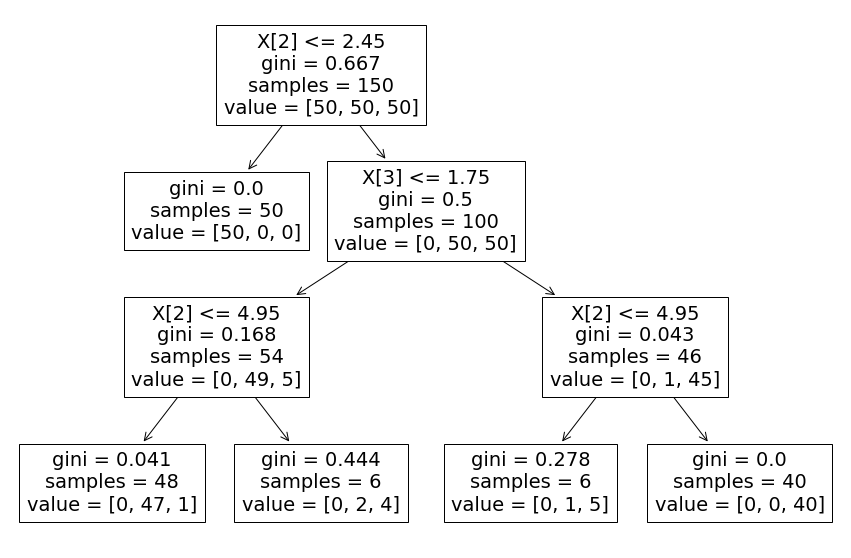

In [5]:
from pylab import rcParams
rcParams['figure.figsize'] = 15, 10
tree.plot_tree(clf) 
plt.show()

In [6]:
pred_class = clf.predict(X)

In [7]:
df = pd.DataFrame({"act":y,"pred":pred_class})

In [8]:
df.head()

,act,pred
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


In [9]:
from sklearn.metrics import classification_report,confusion_matrix

In [10]:
print(classification_report(y, pred_class,labels=[0,1,2]))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.98      0.94      0.96        50
           2       0.94      0.98      0.96        50

    accuracy                           0.97       150
   macro avg       0.97      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150



In [11]:
print(confusion_matrix(y, pred_class,labels=[0,1,2]))

[[50  0  0]
 [ 0 47  3]
 [ 0  1 49]]


In [12]:
# Train test split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn import tree
from matplotlib import pyplot as plt
import pandas as pd

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [14]:
clf = clf.fit(X_train, y_train)

In [15]:
y_test_pred=clf.predict(X_test)

In [16]:
print(classification_report(y_test, y_test_pred,labels=[0,1,2]))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        15
           2       1.00      1.00      1.00        16

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



In [17]:
print(confusion_matrix(y_test, y_test_pred,labels=[0,1,2]))

[[19  0  0]
 [ 0 15  0]
 [ 0  0 16]]


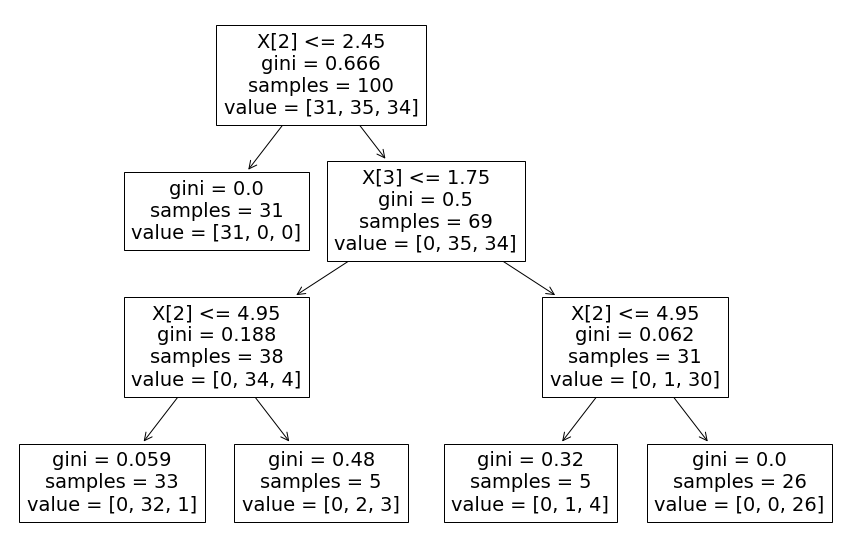

In [18]:
from pylab import rcParams
rcParams['figure.figsize'] = 15, 10
tree.plot_tree(clf) 
plt.show()

In [19]:
df =pd.read_csv("florence.csv")

In [20]:
df.columns

Index(['Seq', 'ID', 'Gender', 'M', 'Recency', 'F', 'FirstPruch', 'ChildBks',
       'YouthBks', 'CookBks', 'DoltYBks', 'RefBks', 'ArtBks', 'GeogBks',
       'ItalCook', 'ItalAtlas', 'ItalArt', 'Florence', 'Rela_pruchace'],
      dtype='object')

In [21]:
X = df.loc[:,"Gender":"ItalArt"].values
y = df["Florence"].values

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [64]:
clf = tree.DecisionTreeClassifier(max_depth=8)
clf = clf.fit(X_train, y_train)

In [43]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf = clf.fit(X_train, y_train)

/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [68]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=500,max_features=5,criterion='entropy')
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features=5,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [69]:
y_test_pred=clf.predict(X_test)

In [70]:
print(classification_report(y_test, y_test_pred,labels=[0,1]))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95       446
           1       0.43      0.06      0.11        49

    accuracy                           0.90       495
   macro avg       0.67      0.53      0.53       495
weighted avg       0.86      0.90      0.86       495



In [71]:
print(confusion_matrix(y_test, y_test_pred,labels=[0,1]))

[[442   4]
 [ 46   3]]


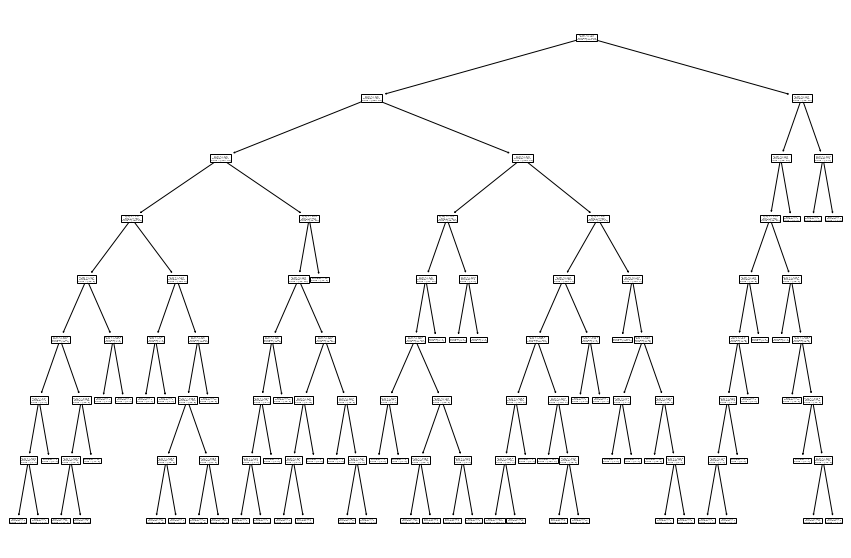

In [38]:
from pylab import rcParams
rcParams['figure.figsize'] = 15, 10
tree.plot_tree(clf) 
plt.show()

In [63]:
y_test_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,